<a href="https://colab.research.google.com/github/DulainNimthakaJayasumana/Learning-ML/blob/main/Python_Lab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data **Manipulations**

Pandas is a powerful, fast, and open-source library built on NumPy.

# 1- Load your dataset in Colab with Pandas library

: Reading CSV file using pd.read_csv and loading data.

In [3]:
import pandas as pd

# Replace '/content/Mall_Customers.csv' with your file path
data_frame = pd.read_csv('/content/Mall_Customers.csv')


**data_frame.head()** displays the first five rows and **data_frame.tail() **displays the last five rows. If we want to get the first ‘n’ number of rows, then we use **data_frame.head(n)** is similar to the syntax used to print the last n rows of the data frame, **data_frame.tail(n)**



In [4]:
data_frame.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,NaN,NaN,40.0


In [5]:
data_frame.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35.0,120.0,79.0
196,197,Female,45.0,126.0,28.0
197,198,Male,32.0,126.0,74.0
198,199,Male,32.0,137.0,18.0
199,200,Male,30.0,137.0,83.0


display the column names of the data_frame by applying the list function

In [6]:
# Program to print all the column names of the data_frame
list(data_frame.columns)

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

functions ***info()*** prints the summary of a data_frame that includes the data type of each column.

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     197 non-null    float64
 3   Annual Income (k$)      198 non-null    float64
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


## Recorded data value errors

There can be value errors. The describe() function outputs descriptive statistics, which include those that summarise the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

By default, for numeric data, the result’s index will include count, mean, std, min, and max, as well as lower, 50, and upper percentiles

In [8]:
data_frame.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,197.000000,198.000000,199.000000
mean,100.500000,39.000000,61.005051,50.256281
std,57.879185,14.002915,26.017857,25.876350
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.250000,34.500000
50%,100.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


For object data (e.g. categorical values), the result’s index will include count, unique, top, and freq.

In [9]:
data_frame.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


Data dimension, you are asked about the number of rows and the number of columns.

In [10]:
data_frame.shape

(200, 5)

To find the number of missing values in the dataset, use data_frame.isnull( ).sum( ). If the dataset doesn’t contain any null values, each column’s output is 0.

In [11]:
data_frame.isnull().sum()

,0
CustomerID,0
Gender,0
Age,3
Annual Income (k$),2
Spending Score (1-100),1


The percentage of missing data values per variable need to understand that the length of the dataset is the number of rows, the number of customers. Therefore, missing values in a column occupy a percentage of the variable length

In [12]:
data_frame.isna().sum()/len(data_frame)*100

,0
CustomerID,0.0
Gender,0.0
Age,1.5
Annual Income (k$),1.0
Spending Score (1-100),0.5


We can drop the row at a particular index. If we want to replace the data_frame with the row removed.

In [13]:
#Removing 4th indexed value from the data_frame
data_frame.drop(4, inplace = True)
data_frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
5,6,Female,22.0,17.0,76.0



To remove multiple rows (instances),  we can include a list of indices for those instances. For example, remove instances 1 and 3.


In [14]:
data_frame.drop(data_frame.index[[1,3]], inplace=True)

## Removing unnecessary variables from your analysis

to remove the columns of a data frame by adding the attribute axis =1 and providing the list of columns we would like to remove. data_frame = data_frame.drop('column_name', axis=1)

In [15]:
data_frame.drop('CustomerID', axis=1, inplace=True)
data_frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.0,15.0,NaN
2,Female,20.0,16.0,6.0
5,Female,22.0,17.0,76.0
6,Female,NaN,18.0,6.0
7,Female,23.0,18.0,94.0


Use a list within the drop function that contains a list of the column names to be removed.

In [16]:
data_frame.drop(['Gender', 'Age'],axis=1, inplace=True)
data_frame.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,NaN
2,16.0,6.0
5,17.0,76.0
6,18.0,6.0
7,18.0,94.0


When trying to make changes to a Pandas data frame using a function, we use 'inplace=True' if we want to commit the changes to the data frame. 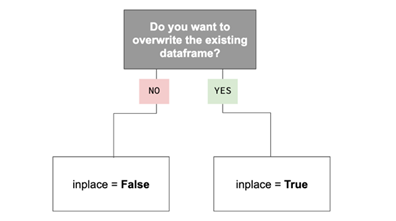

# Renaming columns

Required to change the names of your columns. To rename the columns, we list the original names of the columns to change and then apply the ***rename()*** function using attribute axis=1

In [17]:
#Importing pandas library
import pandas as pd
#Loading data into a DataFrame
data_frame=pd.read_csv('/content/Mall_Customers.csv')
data_frame.rename({'CustomerID':"ID", 'Gender':"Sex", 'Annual Income (k$)':"Salary"}, axis=1, inplace=True)
data_frame.head()


,ID,Sex,Age,Salary,Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,NaN,NaN,40.0


## Renaming categorical values (labels) in variables

Some machine learning algorithms cannot process categorical variables in a string format; thus, they can throw an error. For that, we convert the (map) or (encode) each category to a numeric type of value

In [18]:
data_frame['Sex'] = data_frame['Sex'].map({'Male': 1 , 'Female': 2})
data_frame.head()

,ID,Sex,Age,Salary,Spending Score (1-100)
0,1,1,19.0,15.0,NaN
1,2,1,NaN,15.0,81.0
2,3,2,20.0,16.0,6.0
3,4,2,23.0,NaN,77.0
4,5,2,NaN,NaN,40.0


In the case of having a variable with a large number of categories (labels), mapping them individually can become cumbersome (difficult to handle). Therefore, you can use a ***LabelEncoder()*** function to automatically map all categories to numeric labels based on their alphabetical order.

In [19]:
import pandas as pd
data_frame=pd.read_csv('/content/Mall_Customers.csv')

data_frame.rename({'CustomerID':"ID", 'Gender':"Sex", 'Annual Income (k$)':"Salary"}, axis=1, inplace=True)

data_frame.head()


,ID,Sex,Age,Salary,Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,NaN,NaN,40.0


check the unique values in the variable  ***“Sex”***; for that, you can use the ***unique()*** function.

In [20]:
data_frame['Sex'].unique()

array(['Male', 'Female'], dtype=object)

Import the library sklearn, which has the preprocessing package with the ***LableEncoder()*** function to encode the categorical values for the variable ***“Sex”***

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_encoder = preprocessing.LabelEncoder()
data_frame['Sex']= label_encoder.fit_transform(data_frame['Sex'])

data_frame.head()

,ID,Sex,Age,Salary,Spending Score (1-100)
0,1,1,19.0,15.0,NaN
1,2,1,NaN,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,NaN,77.0
4,5,0,NaN,NaN,40.0


*data.head()* results output from the ***map()*** and ***LabelEncoder()*** functions, you notice that in the ***map()***, Males and Females were encoded to 1 and 2, respectively. However, the ***LabelEncoder()*** encoded Males as 1 and Females as 0; this numeric ranking is due to the alphabetical order of the categories, F before M

## Filtering

First, remove the spaces in the ***Spending Score (1-100)*** variable by renaming it Spending_Score.

In [22]:
data_frame.rename({' Spending Score (1-100)':"Spending_Score"}, axis=1, inplace=True)
data_frame.head()

,ID,Sex,Age,Salary,Spending Score (1-100)
0,1,1,19.0,15.0,NaN
1,2,1,NaN,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,NaN,77.0
4,5,0,NaN,NaN,40.0


Use the logical operators in the column Spending_Score values to filter all customers whose spending score was below 70.  call their dataset low_spenders_data. Once they are filtered, check the minimum and maximum values for the Spending_Score variable in their descriptive stats.



In [23]:
import pandas as pd
data_frame=pd.read_csv('/content/Mall_Customers.csv')
data_frame.rename({'CustomerID':"ID", 'Gender':"Sex"}, axis=1, inplace=True)
data_frame.head()

data_frame['Sex'].unique()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
data_frame['Sex']= label_encoder.fit_transform(data_frame['Sex'])
data_frame.head()

# Ensure the column name is 'Spending Score (1-100)' before renaming
data_frame.rename({'Spending Score (1-100)':"Spending_Score"}, axis=1,inplace=True) # Correctly rename the column
data_frame.head()

# Now you should be able to access the 'Spending_Score' column
low_spenders_data= data_frame[data_frame.Spending_Score < 70]
low_spenders_data.describe()

,ID,Sex,Age,Annual Income (k$),Spending_Score
count,145.000000,145.000000,143.000000,144.000000,145.000000
mean,97.193103,0.448276,42.321678,59.763889,38.020690
std,52.330188,0.499041,14.760340,23.184268,18.394772
min,3.000000,0.000000,18.000000,16.000000,1.000000
25%,57.000000,0.000000,31.000000,44.000000,22.000000
50%,93.000000,0.000000,43.000000,60.000000,42.000000
75%,135.000000,1.000000,52.500000,73.000000,52.000000
max,199.000000,1.000000,70.000000,137.000000,69.000000


In [24]:
low_spenders_data= data_frame[data_frame.Spending_Score < 70]
low_spenders_data.describe()

,ID,Sex,Age,Annual Income (k$),Spending_Score
count,145.000000,145.000000,143.000000,144.000000,145.000000
mean,97.193103,0.448276,42.321678,59.763889,38.020690
std,52.330188,0.499041,14.760340,23.184268,18.394772
min,3.000000,0.000000,18.000000,16.000000,1.000000
25%,57.000000,0.000000,31.000000,44.000000,22.000000
50%,93.000000,0.000000,43.000000,60.000000,42.000000
75%,135.000000,1.000000,52.500000,73.000000,52.000000
max,199.000000,1.000000,70.000000,137.000000,69.000000


In [25]:
high_earners_low_spenders_data = data_frame[(data_frame['Annual Income (k$)'] > 59.76) &
(data_frame.Spending_Score < 70)]
high_earners_low_spenders_data.describe()

,ID,Sex,Age,Annual Income (k$),Spending_Score
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,140.164384,0.493151,40.068493,77.287671,34.027397
std,32.965476,0.503413,13.849718,17.164627,18.828888
min,93.000000,0.000000,18.000000,60.000000,1.000000
25%,111.000000,0.000000,28.000000,63.000000,16.000000
50%,135.000000,0.000000,40.000000,73.000000,39.000000
75%,170.000000,1.000000,49.000000,87.000000,49.000000
max,199.000000,1.000000,68.000000,137.000000,69.000000


use values in other variables to construct a new variable that holds new values. We can add new columns to our dataset. call it “New Column” holding a single value of 1 for all rows.

In [26]:
#Creates a new column with all the values equal to 1
data_frame['NewColumn'] = 1
data_frame.head()

,ID,Sex,Age,Annual Income (k$),Spending_Score,NewColumn
0,1,1,19.0,15.0,NaN,1
1,2,1,NaN,15.0,81.0,1
2,3,0,20.0,16.0,6.0,1
3,4,0,23.0,NaN,77.0,1
4,5,0,NaN,NaN,40.0,1


Having a variable with values that do not vary is considered useless and unnecessary. We can create a function that converts values another column to fill in the values for the newly constructed variable from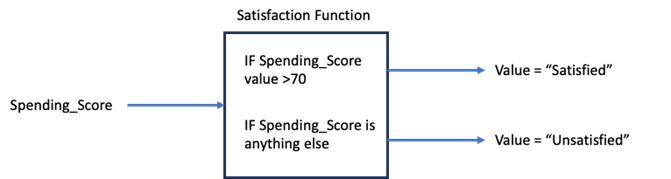

To build this box, we create a function in Python. A function in Python is defined by df followed by the name of the function. In our case, our function box is called “Satisfaction”, and the argument it will be modifying or testing is the “value” of the Spending_Score variable for customers. Let’s code this satisfaction function:

In [27]:
def satisfaction(value):
    if value > 70:
        return "Satisfied"
    else:
        return "Unsatisfied"


. This will convert the values in the Spending_Score variable to either “Satisfied” or “Unsatisfied”.

In [28]:
data_frame['Spending_Score'].apply(satisfaction)

,Spending_Score
0,Unsatisfied
1,Satisfied
2,Unsatisfied
3,Satisfied
4,Unsatisfied
...,...
195,Satisfied
196,Unsatisfied
197,Satisfied
198,Unsatisfied


The output view of the rows; you are not able to see the full column values. You can undo this by applying the ***set_options*** function to pandas to display more rows.

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [30]:
data_frame['Customer_Satisfaction'] = data_frame['Spending_Score'].apply(satisfaction)
data_frame.head()

,ID,Sex,Age,Annual Income (k$),Spending_Score,NewColumn,Customer_Satisfaction
0,1,1,19.0,15.0,NaN,1,Unsatisfied
1,2,1,NaN,15.0,81.0,1,Satisfied
2,3,0,20.0,16.0,6.0,1,Unsatisfied
3,4,0,23.0,NaN,77.0,1,Satisfied
4,5,0,NaN,NaN,40.0,1,Unsatisfied


prepared and cleaned your dataset, you should save it so that you don’t need to rerun the code again. This is productive, so you can apply machine learning.

In [31]:
#This will save the dataset without the raws indeces
data_frame.to_csv(r'/content/Prepared_Mall_Customers.csv', index=False)

# Data Exploration and Visualisation in Google Colab

## **Univariate data visualisations:**

in these plots, a single variable is visualised only; examples of this are frequency distribution plots like histograms and bar plots. To plot a histogram, you can use a library called plotly and its express package.

In [32]:
import plotly.express as px

In [33]:
#lets load your prepared dataset
data = pd.read_csv('/content/Prepared_Mall_Customers.csv')

# Construct the histogram plot for the Spending_Score histogarm
Spending_Score_fig = px.histogram(data, x='Spending_Score')

# Display the plot
Spending_Score_fig.show()


**Histograms are used for plotting variables whose values are numeric (continuous) like integers and floats. Bar plot are for categorical variables (Object data type variables).**

In [34]:
# Construct the histogram plot for the Spending_Score histogarm
Customer_Satisfaction_fig = px.bar(data, x='Customer_Satisfaction')

# Display the plot
Customer_Satisfaction_fig.show()


## Bivariate data visualisations

In these plots, TWO variables are visualised only. Bivariate plots combine two variables in the plot to see if there is any association between them. An example of bivariate plots are scatter plots

In [35]:
Age_Salary_Association_fig = px.scatter(x=data['Spending_Score'], y=data['Annual Income (k$)'])
Age_Salary_Association_fig.show()

create bivariate histograms to compare two distributions with histograms. These are called **“Stacked Histograms”**

In [36]:
Spending_Score_Satisfaction_fig = px.histogram(data, x='Age', color='Customer_Satisfaction')
Spending_Score_Satisfaction_fig.show()

Barmode='overlay' to create an overlaid histogram.

In [37]:
Spending_Score_Satisfaction_fig = px.histogram(data, x='Age', color='Customer_Satisfaction', barmode='overlay')
Spending_Score_Satisfaction_fig.show()

Create bivariate bar plots to compare two mixed distributions; one is for a numeric variable, and the other for a categorical variable. These are also called “Stacked Bar Charts”

In [38]:
Spending_Score_Satisfaction_fig = px.bar(data, x='Customer_Satisfaction', color='Annual Income (k$)')
Spending_Score_Satisfaction_fig.show()


create **bivariate bar plots** to compare two categorical distributions, each for a categorical (object-data type) variable. These are also called **Stacked Bar Charts.**

In [39]:
data['Sex'] = data['Sex'].map({1:'Male', 0:'Female'})
Spending_Score_Satisfaction_fig = px.bar(data, x='Customer_Satisfaction', color='Sex')
Spending_Score_Satisfaction_fig.show()

**Clustered Bar Charts**-find any interestingness when visualising the distribution of “Age” compared to “Customer_Satisfaction”

In [40]:
data['Sex'] = data['Sex'].map({1:'Male', 0:'Female'})
Spending_Score_Satisfaction_fig = px.histogram(data, x='Age', color='Customer_Satisfaction', barmode="group")
Spending_Score_Satisfaction_fig.show()

## Multivariate plots

Combine more than two variables, hence the name. In these plots, you can try to find association/interestingness between all of them. Combine three variables, **“Customer_Satisfaction”, “Age”**, and **“Salary”** in one scatterplot

In [41]:
Age_Salary_Satisfaction_fig = px.scatter(data, x="Age", y="Annual Income (k$)", color="Customer_Satisfaction")
Age_Salary_Satisfaction_fig.show()

# Finding Outliers & Extreme Values

Outliers and Extreme values are the inconsistent values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. Outliers and Extreme values can be the result of various issues like human error in data entry or collection, faulty equipment, poor data sampling or simply these values can indicate a true anomaly or phenomenon.  

A data scientist should use various techniques to visualise and identify outliers before deciding whether they should be dropped, kept, or modified. Let’s load our prepared dataset. Drop any unnecessary variables from your data and display the basic stats for the RETAINED variables. In this case, **“ID”** and **“NewColumn”** are unnecessary variables.

In [42]:
#let’s load your prepared dataset
data = pd.read_csv('/content/Prepared_Mall_Customers.csv')
data.describe().transpose()
#We used transpose to make the columns rows and the rows columns to twist the table

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.0,50.75,100.5,150.25,200.0
Sex,200.0,0.440000,0.497633,0.0,0.00,0.0,1.00,1.0
Age,197.0,39.000000,14.002915,18.0,29.00,36.0,49.00,70.0
Annual Income (k$),198.0,61.005051,26.017857,15.0,42.25,62.0,78.00,137.0
Spending_Score,199.0,50.256281,25.876350,1.0,34.50,50.0,73.00,99.0
NewColumn,200.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [43]:
# Drop unnecessary variables and rename your dataset
df = data.drop(columns=(['ID', 'NewColumn']))
df.describe()

,Sex,Age,Annual Income (k$),Spending_Score
count,200.000000,197.000000,198.000000,199.000000
mean,0.440000,39.000000,61.005051,50.256281
std,0.497633,14.002915,26.017857,25.876350
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,29.000000,42.250000,34.500000
50%,0.000000,36.000000,62.000000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## Using pandas describe() function to find outliers

After checking the data and dropping the columns, use .describe() to generate some summary statistics.Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers. By looking at the stats, we know that we dropped two variables: ***“ID” and “NewColumn”***.

In [44]:
# Drop unnecessary variables and rename your dataset
df = data.drop(columns=(['ID', 'NewColumn']))
df.describe()

,Sex,Age,Annual Income (k$),Spending_Score
count,200.000000,197.000000,198.000000,199.000000
mean,0.440000,39.000000,61.005051,50.256281
std,0.497633,14.002915,26.017857,25.876350
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,29.000000,42.250000,34.500000
50%,0.000000,36.000000,62.000000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### Using data visualisation to find outliers to find outliers

Several different visualisations will help us understand the data and the outliers. The type of plot you pick will depend on the number of variables you’re analysing. These are a few of the most popular visualization methods for finding outliers in data:
<ul><li>Histogram</li>
<li>Box plot</li>
<li>Scatter plot</li></ul>


**a) Using a histogram,** can see how the data is distributed. Having data that follows a normal distribution is necessary for some of the statistical techniques used to detect outliers.

In [46]:
Salary_fig = px.histogram(df, x='Annual Income (k$)')
Salary_fig.show()

B) Using a box plot, a box plot allows us to identify the univariate outliers, or outliers for one variable. Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data. In the chart, the outliers are shown as points, which makes them easy to see

In [47]:
Age_fig = px.box(df, x='Age')
Age_fig.show()

In [49]:
Age_fig = px.box(df, x='Annual Income (k$)')
Age_fig.show()

There is an outlier value in “Salary” but not in “Age”. Above the box and upper fence is a point showing outliers.

**C) Using a scatter plot,** using a Scatter plot, it is possible to review multivariate outliers, or the outliers that exist in two or more variables.

In [51]:
Age_Salary_Scatter_fig = px.scatter(x=df['Age'], y=df['Annual Income (k$)'])
Age_Salary_Scatter_fig.show()

**3- Using  IQR statistical method to find outliers** to find outliers: Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR). Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. Q1 is the 25th percentile, Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

<P>Using the convenient **pandas .quantile() function**, we can create a **simple Python function** that takes in our column from the data frame and outputs the outliers:</P>

In [52]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [54]:
outliers = find_outliers_IQR(df['Annual Income (k$)'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 2


,Annual Income (k$)
198,137.0
199,137.0


In [55]:
df.drop(df.index[[199,198]], inplace=True)

In [57]:
outliers = find_outliers_IQR(df['Annual Income (k$)'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,Annual Income (k$)


In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,198.0,0.434343,0.496927,0.0,0.0,0.0,1.0,1.0
Age,195.0,39.082051,14.050844,18.0,28.5,36.0,49.0,70.0
Annual Income (k$),196.0,60.229592,24.980676,15.0,42.0,61.5,78.0,126.0
Spending_Score,197.0,50.253807,25.799987,1.0,35.0,50.0,73.0,99.0


# Mitigating Missing Data

In [59]:
df.isnull( )

,Sex,Age,Annual Income (k$),Spending_Score,Customer_Satisfaction
0,False,False,False,True,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,True,True,False,False
5,False,False,False,False,False
6,False,True,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [60]:
#To find the percentage of missing data per variable
df.isna().sum()/len(data_frame)*100

,0
Sex,0.0
Age,1.5
Annual Income (k$),1.0
Spending_Score,0.5
Customer_Satisfaction,0.0


In [61]:
df_Complete_Case = data_frame.dropna()
df_Complete_Case

,ID,Sex,Age,Annual Income (k$),Spending_Score,NewColumn,Customer_Satisfaction
2,3,0,20.0,16.0,6.0,1,Unsatisfied
5,6,0,22.0,17.0,76.0,1,Satisfied
7,8,0,23.0,18.0,94.0,1,Satisfied
8,9,1,64.0,19.0,3.0,1,Unsatisfied
9,10,0,30.0,19.0,72.0,1,Satisfied
10,11,1,67.0,19.0,14.0,1,Unsatisfied
11,12,0,35.0,19.0,99.0,1,Satisfied
12,13,0,58.0,20.0,15.0,1,Unsatisfied
13,14,0,24.0,20.0,77.0,1,Satisfied
14,15,1,37.0,20.0,13.0,1,Unsatisfied


In [64]:
Mean_Salary = df['Annual Income (k$)'].mean()
Mean_Spending_Score = df['Spending_Score'].mean()
Mean_Age = df['Age'].mean()

df['Annual Income (k$)'].fillna(Mean_Salary, inplace=True)
df['Spending_Score'].fillna(Mean_Spending_Score, inplace=True)
df['Age'].fillna(Mean_Age, inplace=True)

<ipython-input-64-4a584fb90b9c>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-64-4a584fb90b9c>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [65]:
#To find the percentage of missing data per variable
df.isna().sum()/len(df)*100

,0
Sex,0.0
Age,0.0
Annual Income (k$),0.0
Spending_Score,0.0
Customer_Satisfaction,0.0


In [66]:
#This will save the imputed dataset without the row index
df.to_csv(r'/content/Clean_Mall_Customers.csv', index=False)

In [67]:
import pandas as pd
#let’s load your prepared dataset
df1 = pd.read_csv('/content/Mall_Customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,NaN
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,NaN,NaN,40.0


In [68]:
import pandas as pd
#let’s load your prepared dataset
df2 = pd.read_csv('/content/Mall_Customers_Additional.csv')
df2.head()

,CustomerID,Travel_distance_meters,Dependents
0,1,5040,5
1,2,3492,3
2,3,2795,0
3,4,6315,0
4,5,1978,3


In [69]:
Merged_Mall_df = df1.merge(df2, on='CustomerID')
Merged_Mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,1,Male,19.0,15.0,NaN,5040,5
1,2,Male,NaN,15.0,81.0,3492,3
2,3,Female,20.0,16.0,6.0,2795,0
3,4,Female,23.0,NaN,77.0,6315,0
4,5,Female,NaN,NaN,40.0,1978,3


In [70]:
Merged_Mall_df.to_csv("Merged_Mall_Data.csv", index=False)

In [71]:
import pandas as pd
#let’s load your prepared dataset
df = pd.read_csv('/content/Merged_Mall_Data.csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
count,200.000000,197.000000,198.000000,199.000000,200.000000,200.000000
mean,100.500000,39.000000,61.005051,50.256281,4915.625000,2.525000
std,57.879185,14.002915,26.017857,25.876350,2796.210913,1.820976
min,1.000000,18.000000,15.000000,1.000000,174.000000,0.000000
25%,50.750000,29.000000,42.250000,34.500000,2324.000000,1.000000
50%,100.500000,36.000000,62.000000,50.000000,4958.000000,3.000000
75%,150.250000,49.000000,78.000000,73.000000,7243.750000,4.000000
max,200.000000,70.000000,137.000000,99.000000,9994.000000,5.000000


In [72]:
from sklearn.preprocessing import StandardScaler
#drop unnecessary numeric and non-numeric variables
df_numeric = df.drop(columns=(['CustomerID', 'Gender']))
ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)
df_scaled

array([[-1.43191295e+00, -1.77269273e+00,             nan,
         4.45914533e-02,  1.36257170e+00],
       [            nan, -1.77269273e+00,  1.19109751e+00,
        -5.10404082e-01,  2.61503659e-01],
       [-1.36031730e+00, -1.73416016e+00, -1.71461193e+00,
        -7.60295483e-01, -1.39009840e+00],
       [-1.14553036e+00,             nan,  1.03612634e+00,
         5.01709869e-01, -1.39009840e+00],
       [            nan,             nan, -3.97356984e-01,
        -1.05320979e+00,  2.61503659e-01],
       [-1.21712600e+00, -1.69562759e+00,  9.97383551e-01,
         1.05316498e-02, -1.39009840e+00],
       [            nan, -1.65709503e+00, -1.71461193e+00,
        -1.77693580e-01, -1.39009840e+00],
       [-1.14553036e+00, -1.65709503e+00,  1.69475382e+00,
         8.02870237e-01, -2.89030360e-01],
       [ 1.78989118e+00, -1.61856246e+00, -1.83084031e+00,
        -9.20062851e-02, -1.39009840e+00],
       [-6.44360826e-01, -1.61856246e+00,  8.42412380e-01,
         1.53582825e-01

In [73]:
df_scaled = pd.DataFrame(df_scaled,columns = df_numeric.columns)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,-1.431913,-1.772693,NaN,0.044591,1.362572
1,NaN,-1.772693,1.191098,-0.510404,0.261504
2,-1.360317,-1.734160,-1.714612,-0.760295,-1.390098
3,-1.145530,NaN,1.036126,0.501710,-1.390098
4,NaN,NaN,-0.397357,-1.053210,0.261504


In [74]:
df_scaled.describe()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
count,1.970000e+02,198.000000,1.990000e+02,2.000000e+02,2.000000e+02
mean,9.017040e-18,0.000000,5.802171e-17,-8.881784e-18,7.105427e-17
std,1.002548e+00,1.002535,1.002522e+00,1.002509e+00,1.002509e+00
min,-1.503509e+00,-1.772693,-1.908326e+00,-1.699988e+00,-1.390098e+00
25%,-7.159565e-01,-0.722680,-6.104423e-01,-9.291604e-01,-8.395644e-01
50%,-2.147869e-01,0.038338,-9.929057e-03,1.519246e-02,2.615037e-01
75%,7.159565e-01,0.654859,8.811552e-01,8.346893e-01,8.120377e-01
max,2.219465e+00,2.928281,1.888468e+00,1.820721e+00,1.362572e+00


In [75]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_numeric)
df_mms

array([[1.92307692e-02, 0.00000000e+00,            nan, 4.95519348e-01,
        1.00000000e+00],
       [           nan, 0.00000000e+00, 8.16326531e-01, 3.37881874e-01,
        6.00000000e-01],
       [3.84615385e-02, 8.19672131e-03, 5.10204082e-02, 2.66904277e-01,
        0.00000000e+00],
       [9.61538462e-02,            nan, 7.75510204e-01, 6.25356415e-01,
        0.00000000e+00],
       [           nan,            nan, 3.97959184e-01, 1.83706721e-01,
        6.00000000e-01],
       [7.69230769e-02, 1.63934426e-02, 7.65306122e-01, 4.85845214e-01,
        0.00000000e+00],
       [           nan, 2.45901639e-02, 5.10204082e-02, 4.32382892e-01,
        0.00000000e+00],
       [9.61538462e-02, 2.45901639e-02, 9.48979592e-01, 7.10896130e-01,
        4.00000000e-01],
       [8.84615385e-01, 3.27868852e-02, 2.04081633e-02, 4.56720978e-01,
        0.00000000e+00],
       [2.30769231e-01, 3.27868852e-02, 7.24489796e-01, 5.26476578e-01,
        1.00000000e+00],
       [9.42307692e-01, 3.2786

In [76]:
df_mms = pd.DataFrame(df_mms,columns = df_numeric.columns)
df_mms.head()

,Age,Annual Income (k$),Spending Score (1-100),Travel_distance_meters,Dependents
0,0.019231,0.000000,NaN,0.495519,1.0
1,NaN,0.000000,0.816327,0.337882,0.6
2,0.038462,0.008197,0.051020,0.266904,0.0
3,0.096154,NaN,0.775510,0.625356,0.0
4,NaN,NaN,0.397959,0.183707,0.6
